In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")

In [402]:
df=pd.read_csv('election_data.csv')

In [403]:
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


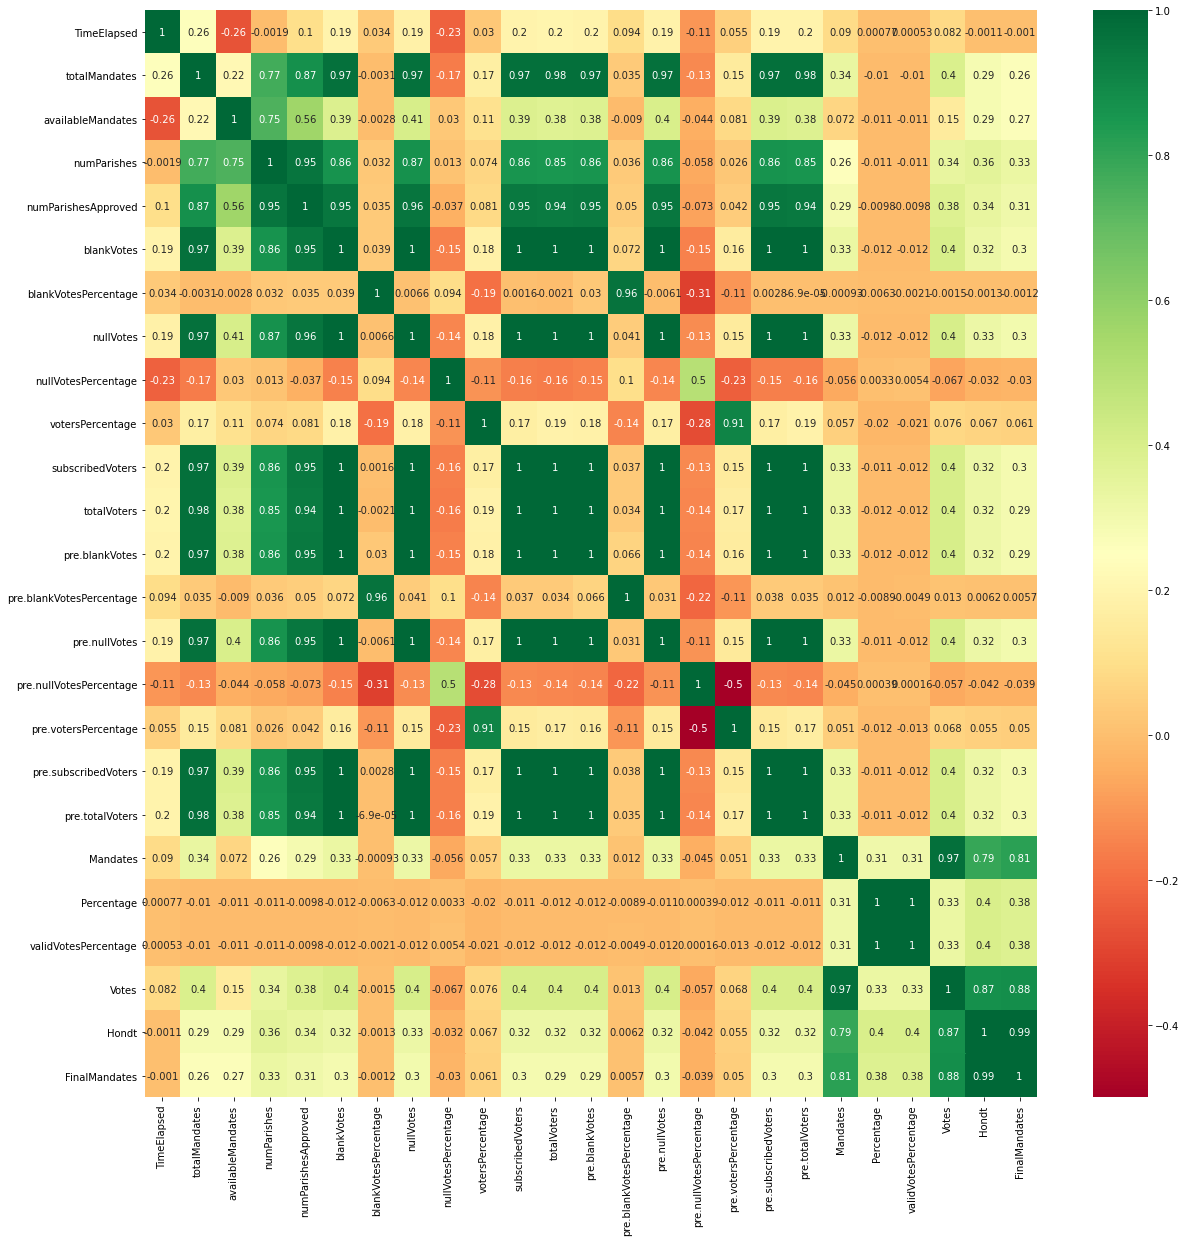

In [404]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [405]:
df.drop(['totalMandates','numParishesApproved','blankVotes','nullVotes','subscribedVoters','totalVoters','pre.blankVotes','pre.nullVotes','pre.subscribedVoters','pre.totalVoters','Percentage','Mandates','pre.blankVotesPercentage','pre.votersPercentage'],axis=1,inplace=True)


In [406]:
df.head()


,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12


In [407]:
df['territoryName'].value_counts()


Leiria                 1134
Território Nacional    1134
Porto                  1134
Braga                  1134
Aveiro                 1080
Setúbal                1080
Madeira                1080
Viseu                  1080
Viana do Castelo       1080
Coimbra                1080
Lisboa                 1080
Guarda                 1026
Évora                  1026
Faro                   1026
Santarém               1026
Castelo Branco          972
Bragança                972
Portalegre              918
Beja                    918
Vila Real               864
Açores                  799
Name: territoryName, dtype: int64

In [408]:
df['Party'].value_counts()


L            1127
B.E.         1127
CDS-PP       1127
PCP-PEV      1127
PNR          1127
IL           1127
PAN          1127
PS           1127
A            1127
PPD/PSD      1127
PCTP/MRPP    1127
PDR          1127
CH           1127
PPM          1073
R.I.R.       1026
PTP          1019
MPT          1019
PURP          972
NC            972
JPP           486
MAS           425
Name: Party, dtype: int64

In [409]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TimeElapsed              21643 non-null  int64  
 1   time                     21643 non-null  object 
 2   territoryName            21643 non-null  object 
 3   availableMandates        21643 non-null  int64  
 4   numParishes              21643 non-null  int64  
 5   blankVotesPercentage     21643 non-null  float64
 6   nullVotesPercentage      21643 non-null  float64
 7   votersPercentage         21643 non-null  float64
 8   pre.nullVotesPercentage  21643 non-null  float64
 9   Party                    21643 non-null  object 
 10  validVotesPercentage     21643 non-null  float64
 11  Votes                    21643 non-null  int64  
 12  Hondt                    21643 non-null  int64  
 13  FinalMandates            21643 non-null  int64  
dtypes: float64(5), int64(6

In [410]:
numerical_variables=[features for features in df.columns if df[features].dtypes!='O']
numerical_variables.remove('FinalMandates')
numerical_variables


['TimeElapsed',
 'availableMandates',
 'numParishes',
 'blankVotesPercentage',
 'nullVotesPercentage',
 'votersPercentage',
 'pre.nullVotesPercentage',
 'validVotesPercentage',
 'Votes',
 'Hondt']

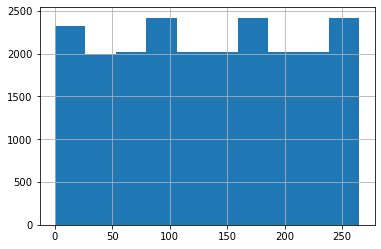

In [411]:
df['TimeElapsed'].hist()


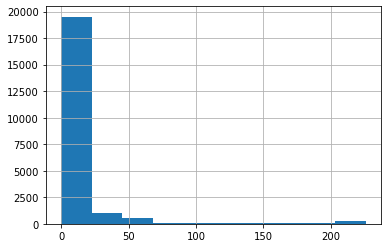

In [412]:
df['availableMandates'].hist()


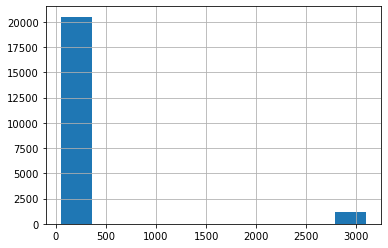

In [413]:
df['numParishes'].hist()



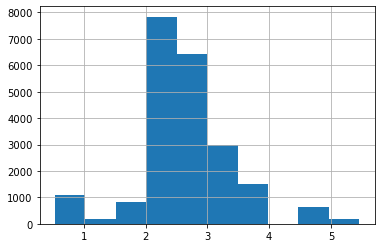

In [414]:
df['blankVotesPercentage'].hist()


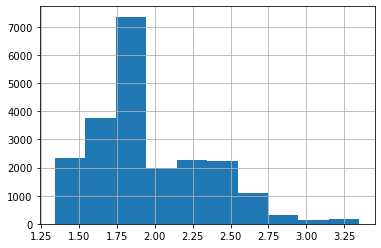

In [415]:
df['nullVotesPercentage'].hist()


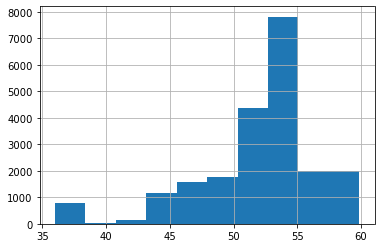

In [416]:
df['votersPercentage'].hist()



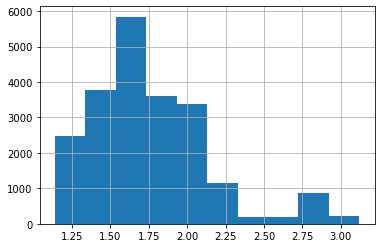

In [417]:
df['pre.nullVotesPercentage'].hist()


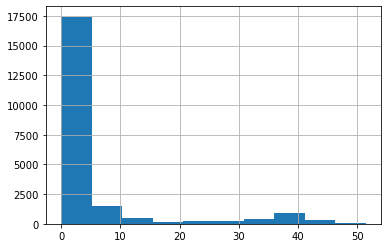

In [418]:
df['validVotesPercentage'].hist()


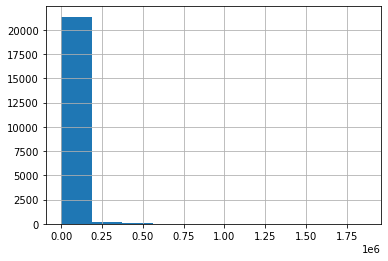

In [419]:
df['Votes'].hist()


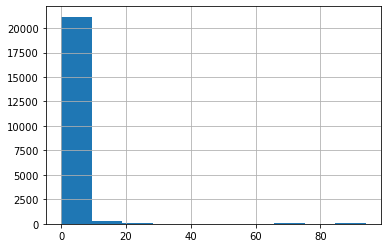

In [420]:
df['Hondt'].hist()


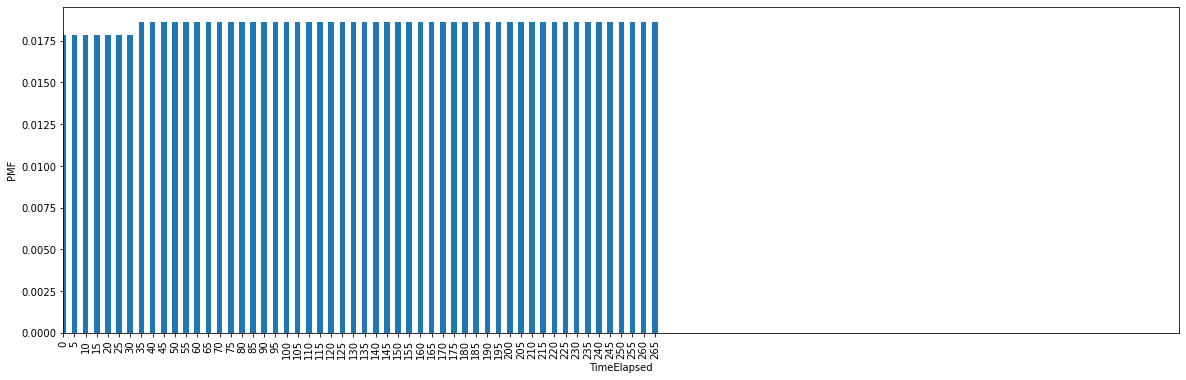

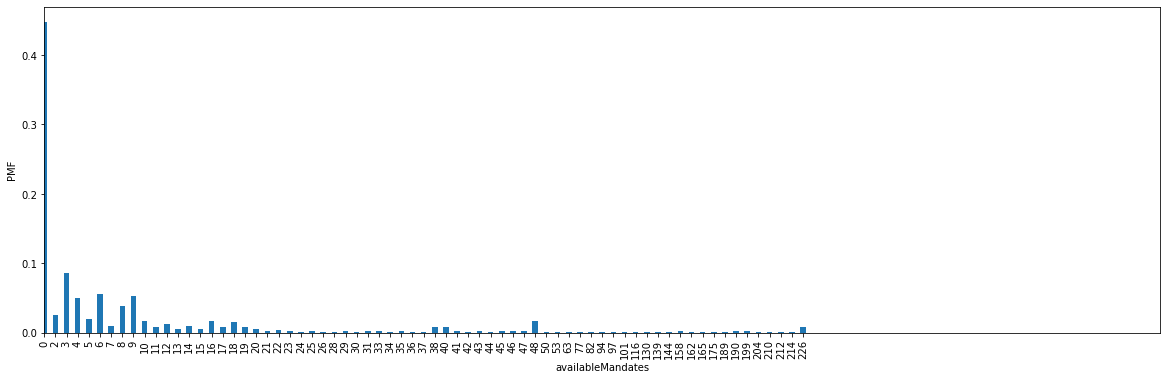

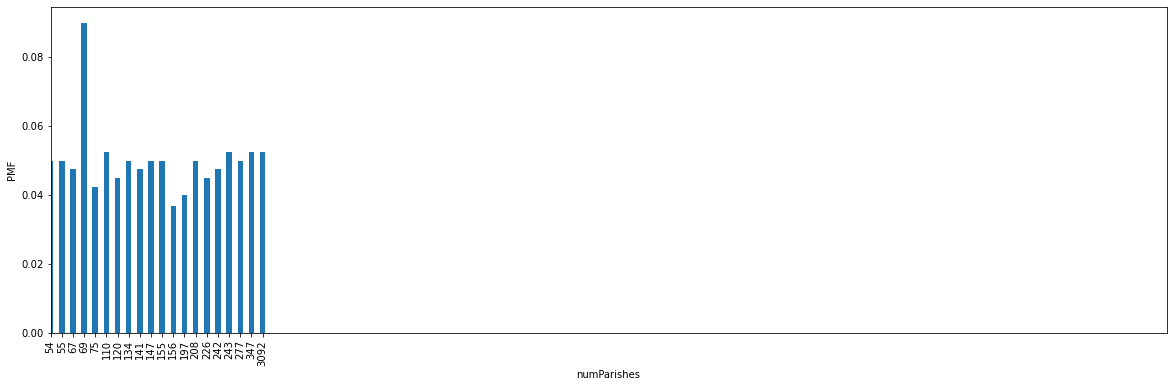

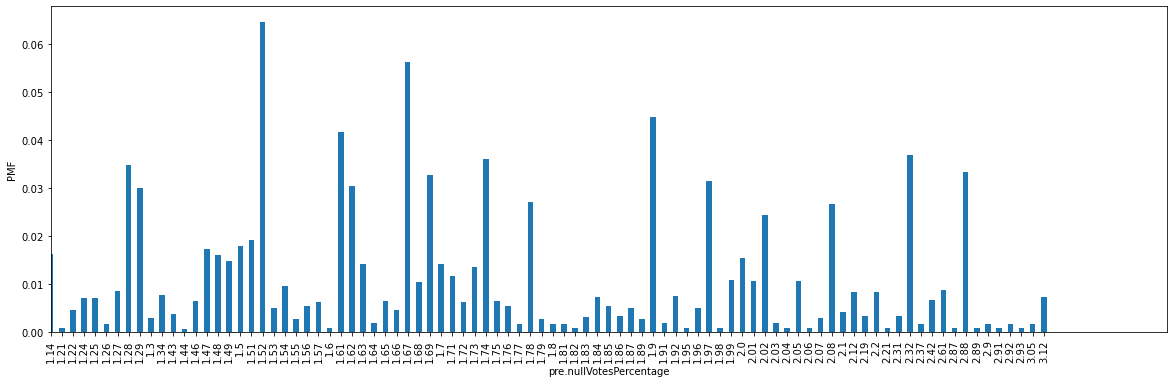

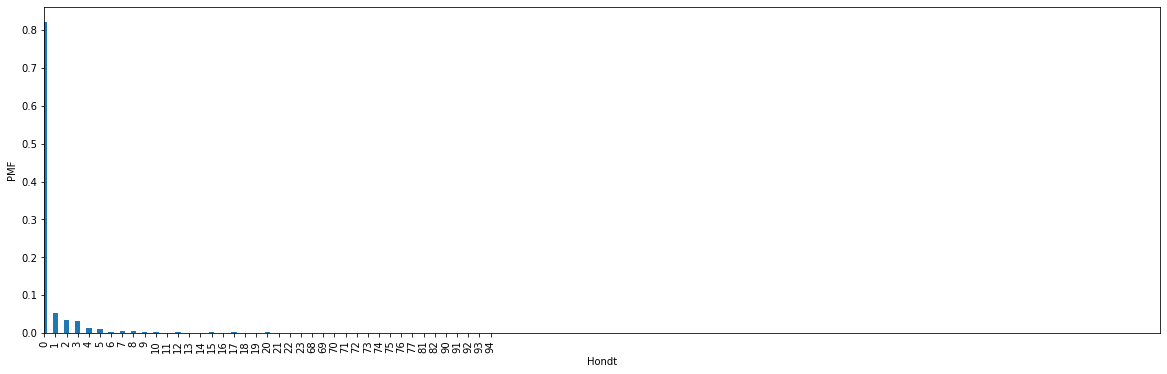

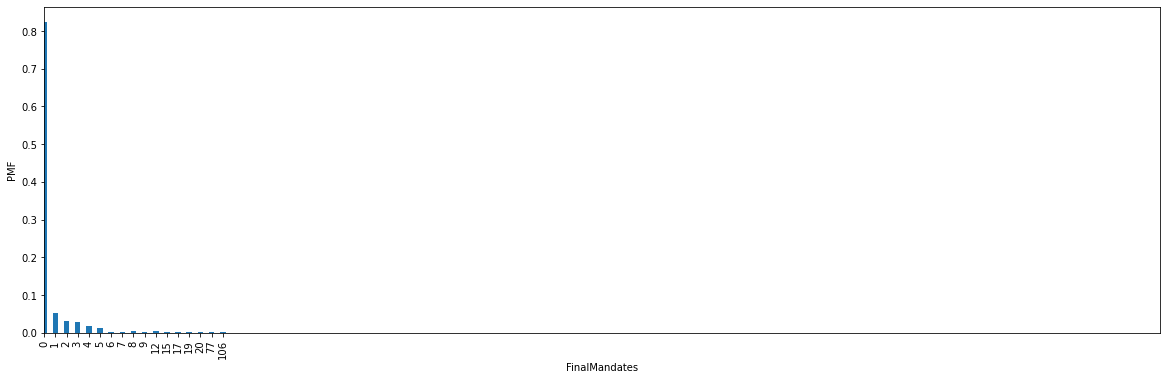

In [421]:
def pmf_func(dataset,lists):
    for i in lists:
        pmf = dataset[i].value_counts().sort_index() / len(dataset[i])
        plt.figure(figsize = (20,6))
        pmf.plot(kind='bar')
        plt.xlabel(i)
        plt.ylabel('PMF')
        plt.xlim(0,100)
few_unique=['TimeElapsed','availableMandates','numParishes','pre.nullVotesPercentage','Hondt','FinalMandates']        
pmf_func(df,few_unique)

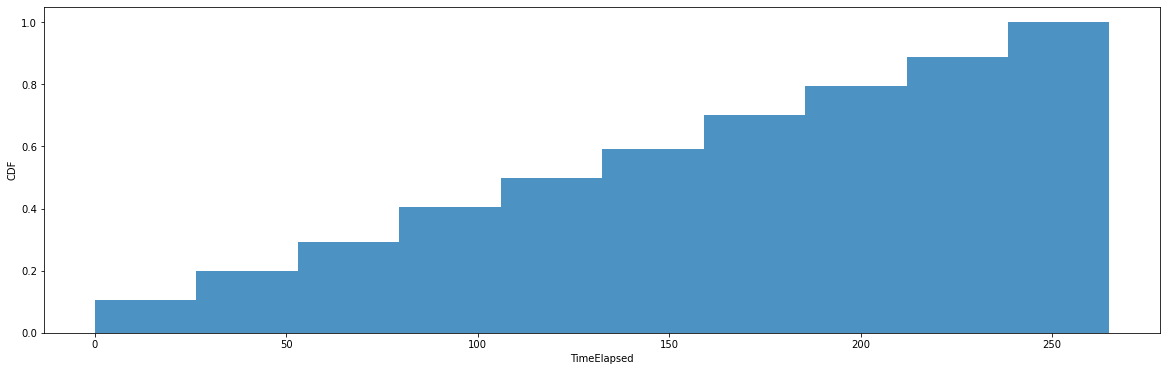

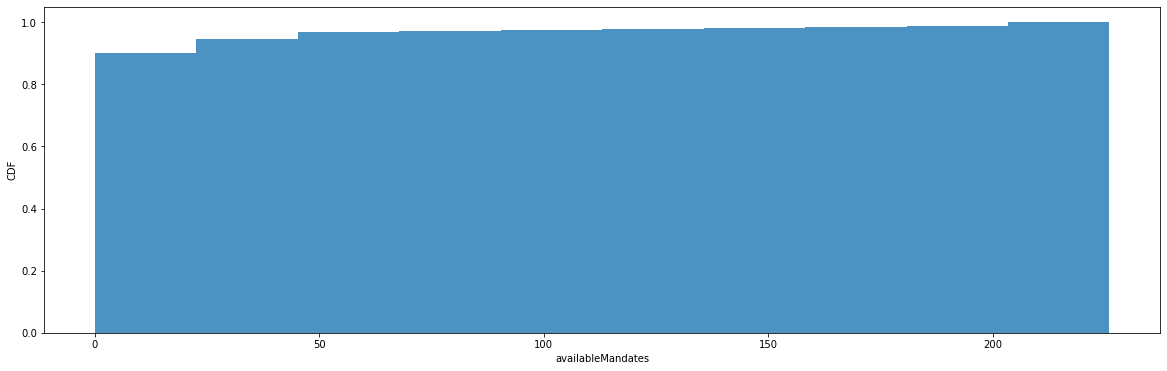

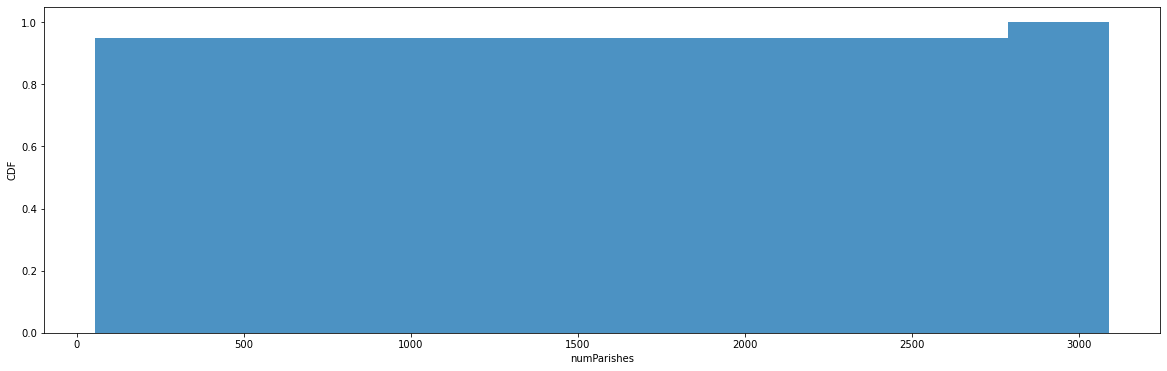

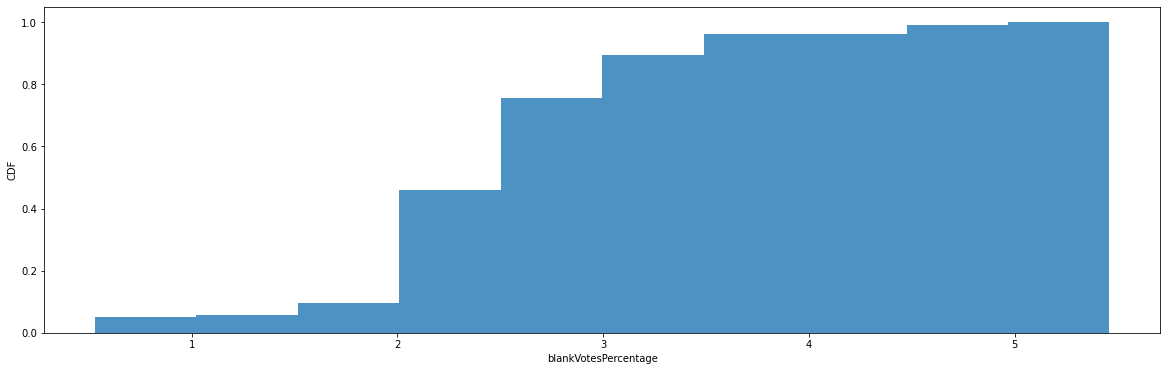

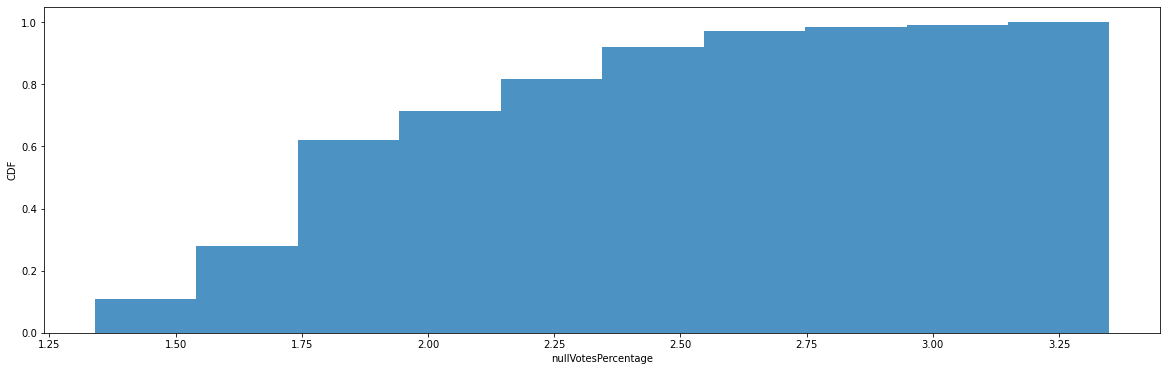

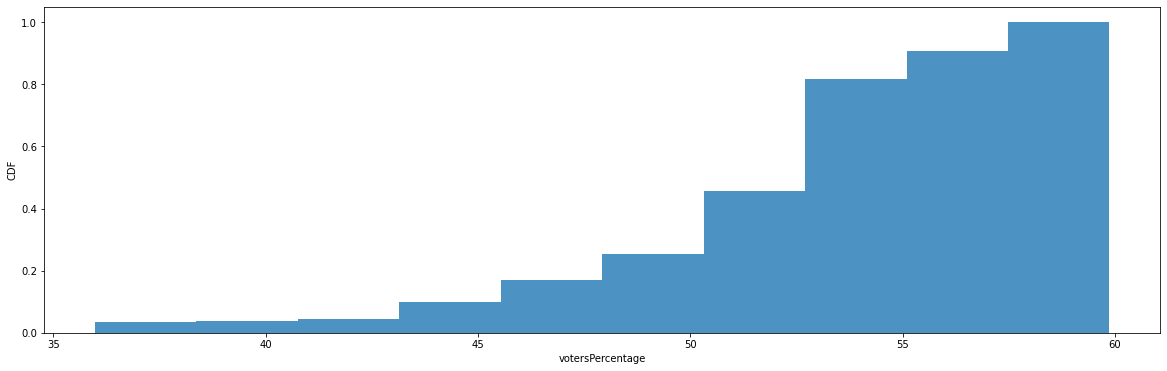

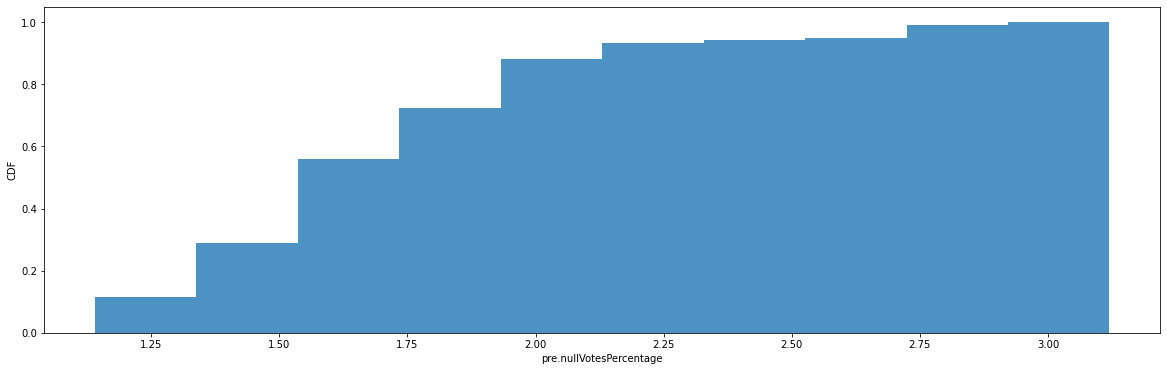

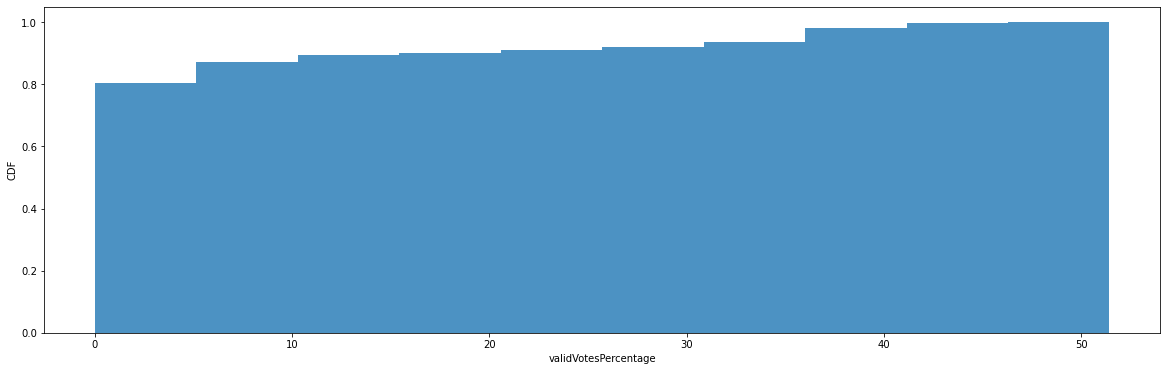

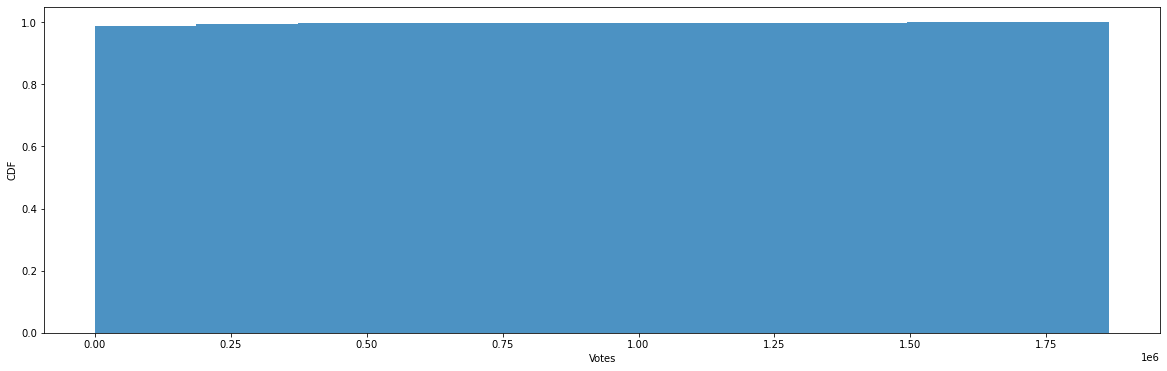

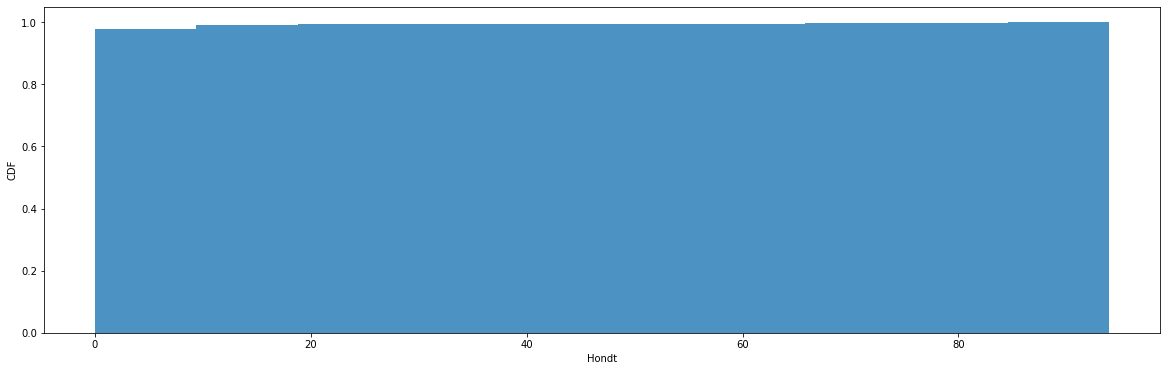

In [422]:
from scipy.stats import norm
def cdf_func(dataset,lists):
    for i in lists:
        plt.figure(figsize = (20,6))
        plt.hist(dataset[i], density=True, cumulative=True, label='CDF', alpha=0.8)
        plt.xlabel(i)
        plt.ylabel('CDF')
cdf_func(df,numerical_variables)

In [423]:
import scipy.stats as stats
dataset_table=pd.crosstab(df['territoryName'],df['Party'])
print(dataset_table)


Party                 A  B.E.  CDS-PP  CH  IL  JPP   L  MAS  MPT  NC  ...  \
territoryName                                                         ...   
Aveiro               54    54      54  54  54   54  54    0   54  54  ...   
Açores               47    47      47  47  47    0  47   47   47   0  ...   
Beja                 54    54      54  54  54    0  54    0   54  54  ...   
Braga                54    54      54  54  54   54  54   54   54  54  ...   
Bragança             54    54      54  54  54    0  54    0    0  54  ...   
Castelo Branco       54    54      54  54  54    0  54    0   54   0  ...   
Coimbra              54    54      54  54  54   54  54   54   54  54  ...   
Faro                 54    54      54  54  54    0  54    0   54  54  ...   
Guarda               54    54      54  54  54    0  54    0   54  54  ...   
Leiria               54    54      54  54  54   54  54   54   54  54  ...   
Lisboa               54    54      54  54  54    0  54   54   54  54  ...   

In [424]:
dataset_table.values


array([[54, 54, 54, 54, 54, 54, 54,  0, 54, 54, 54, 54, 54, 54, 54, 54,
        54, 54, 54, 54, 54],
       [47, 47, 47, 47, 47,  0, 47, 47, 47,  0, 47, 47, 47, 47, 47, 47,
        47, 47, 47,  0,  0],
       [54, 54, 54, 54, 54,  0, 54,  0, 54, 54, 54, 54, 54, 54, 54, 54,
        54, 54, 54,  0,  0],
       [54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
        54, 54, 54, 54, 54],
       [54, 54, 54, 54, 54,  0, 54,  0,  0, 54, 54, 54, 54, 54, 54, 54,
        54, 54, 54, 54, 54],
       [54, 54, 54, 54, 54,  0, 54,  0, 54,  0, 54, 54, 54, 54, 54, 54,
        54, 54, 54, 54, 54],
       [54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
        54, 54,  0, 54, 54],
       [54, 54, 54, 54, 54,  0, 54,  0, 54, 54, 54, 54, 54, 54, 54, 54,
        54, 54, 54, 54, 54],
       [54, 54, 54, 54, 54,  0, 54,  0, 54, 54, 54, 54, 54, 54, 54, 54,
        54, 54, 54, 54, 54],
       [54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54,
        54, 54, 54,

In [425]:
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[54 54 54 54 54 54 54  0 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [47 47 47 47 47  0 47 47 47  0 47 47 47 47 47 47 47 47 47  0  0]
 [54 54 54 54 54  0 54  0 54 54 54 54 54 54 54 54 54 54 54  0  0]
 [54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54  0  0 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54  0 54  0 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54  0 54 54]
 [54 54 54 54 54  0 54  0 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54  0 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54  0 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54  0 54  0 54 54 54 54 54 54  0 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54  0 54  0 54 54 54 54 54 54 54 54 54 54 

In [426]:
val=stats.chi2_contingency(dataset_table)


In [427]:
val


(1948.5199687841082,
 1.3607820211281645e-201,
 400,
 array([[56.23804463, 56.23804463, 56.23804463, 56.23804463, 56.23804463,
         24.25172111, 56.23804463, 21.20778081, 50.84877328, 48.50344222,
         56.23804463, 56.23804463, 56.23804463, 56.23804463, 56.23804463,
         56.23804463, 53.54340895, 56.23804463, 50.84877328, 48.50344222,
         51.1980779 ],
        [41.60573858, 41.60573858, 41.60573858, 41.60573858, 41.60573858,
         17.94178256, 41.60573858, 15.68983043, 37.61867578, 35.88356512,
         41.60573858, 41.60573858, 41.60573858, 41.60573858, 41.60573858,
         41.60573858, 39.61220718, 41.60573858, 37.61867578, 35.88356512,
         37.87709652],
        [47.80233794, 47.80233794, 47.80233794, 47.80233794, 47.80233794,
         20.61396294, 47.80233794, 18.02661369, 43.22145728, 41.22792589,
         47.80233794, 47.80233794, 47.80233794, 47.80233794, 47.80233794,
         47.80233794, 45.51189761, 47.80233794, 43.22145728, 41.22792589,
         43.5

In [428]:
Expected_Values=val[3]


In [429]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [430]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [431]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 13.878458601485704


In [432]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)


critical_value: 3.841458820694124


In [433]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)


p-value: 0.00019502095665746566
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.00019502095665746566


In [434]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")



Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


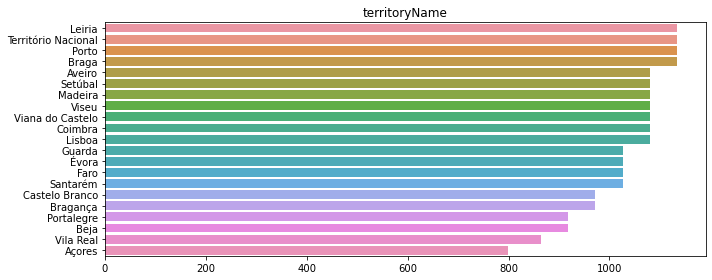

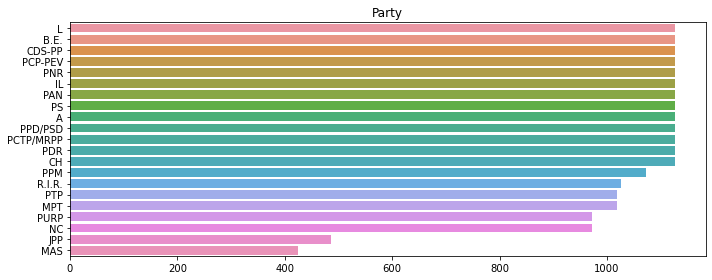

In [435]:
categorcial_variables = ['territoryName','Party']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    #plt.hist(col, normed=True, cumulative=True, label='CDF',histtype='step', alpha=0.8, color='k')
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()


In [436]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'availableMandates',
       'numParishes', 'blankVotesPercentage', 'nullVotesPercentage',
       'votersPercentage', 'pre.nullVotesPercentage', 'Party',
       'validVotesPercentage', 'Votes', 'Hondt', 'FinalMandates'],
      dtype='object')

In [437]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)


In [438]:
pd.pivot_table(df, index =['territoryName','availableMandates'] ,values = 'numParishes').sort_values('numParishes',ascending=False)


numParishes
territoryName       availableMandates             
Território Nacional 25                        3092
                    0                         3092
                    101                       3092
                    116                       3092
                    130                       3092
                    226                       3092
                    214                       3092
                    17                        3092
                    139                       3092
                    144                       3092
                    158                       3092
                    9                         3092
                    162                       3092
                    212                       3092
                    210                       3092
                    204                       3092
                    199                       3092
                    190                       3092
                    15                        3092
                    16                        3092
                    189                       3092
                    175                       3092
                    97                        3092
                    165                       3092
                    77                        3092
                    94                        3092
                    29                        3092
                    38                        3092
                    41                        3092
                    42                        3092
                    48                        3092
                    50                        3092
                    53                        3092
                    63                        3092
                    82                        3092
Braga               13                         347
                    12                         347
                    0                          347
                    5                          347
                    6                          347
                    7                          347
                    8                          347
                    9                          347
                    19                         347
                    16                         347
                    15                         347
                    10                         347
                    14                         347
Viseu               0                          277
                    4                          277
                    6                          277
                    8                          277
Porto               14                         243
                    40                         243
                    25                         243
                    35                         243
                    34                         243
                    33                         243
                    31                         243
                    30                         243
                    28                         243
                    26                         243
                    24                         243
                    0                          243
                    22                         243
                    21                         243
                    20                         243
                    38                         243
                    12                         243
                    10                         243
                    8                          243
                    9                          243
                    36                         243
                    37                         243
Guarda              0                          242
                    3                          242
Bragança            3                          226
          

In [439]:
pd.pivot_table(df, index ='Party' ,values = 'blankVotesPercentage').sort_values('blankVotesPercentage',ascending=False)


,blankVotesPercentage
Party,
MAS,3.033035
JPP,2.710329
MPT,2.671384
PPM,2.638211
A,2.618181
PCP-PEV,2.618181
PS,2.618181
PPD/PSD,2.618181
PNR,2.618181


In [440]:

pd.pivot_table(df, index ='Party' ,values = 'nullVotesPercentage').sort_values('nullVotesPercentage',ascending=False)


,nullVotesPercentage
Party,
R.I.R.,1.995624
PURP,1.970031
PPM,1.967875
B.E.,1.965741
PS,1.965741
PPD/PSD,1.965741
PNR,1.965741
PDR,1.965741
PCTP/MRPP,1.965741


In [441]:
pd.pivot_table(df, index ='Party' ,values = 'validVotesPercentage').sort_values('validVotesPercentage',ascending=False)



,validVotesPercentage
Party,
PS,39.513789
PPD/PSD,30.498900
B.E.,8.941145
PCP-PEV,6.982227
CDS-PP,4.674836
PAN,2.544020
CH,1.362236
PCTP/MRPP,0.780195
R.I.R.,0.763733


In [442]:
pd.pivot_table(df,index ='Party', values = 'FinalMandates',aggfunc=np.mean).sort_values('FinalMandates', ascending = False)


,FinalMandates
Party,
PS,10.139308
PPD/PSD,7.366460
B.E.,1.820763
PCP-PEV,1.149956
CDS-PP,0.479148
PAN,0.383319
CH,0.095830
IL,0.095830
L,0.095830


In [443]:
pd.pivot_table(df,index ='territoryName', values = 'FinalMandates',aggfunc='count').sort_values('FinalMandates', ascending = False)


,FinalMandates
territoryName,
Leiria,1134
Braga,1134
Território Nacional,1134
Porto,1134
Aveiro,1080
Viseu,1080
Viana do Castelo,1080
Setúbal,1080
Madeira,1080


In [444]:
df.isnull().sum()


TimeElapsed                0
time                       0
territoryName              0
availableMandates          0
numParishes                0
blankVotesPercentage       0
nullVotesPercentage        0
votersPercentage           0
pre.nullVotesPercentage    0
Party                      0
validVotesPercentage       0
Votes                      0
Hondt                      0
FinalMandates              0
dtype: int64

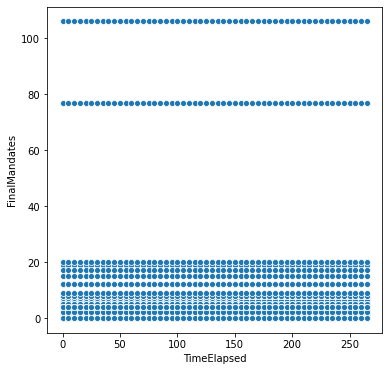

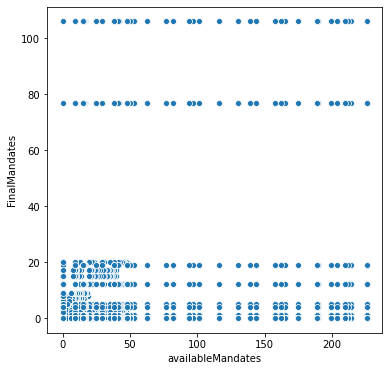

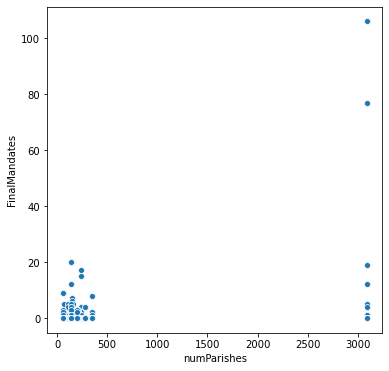

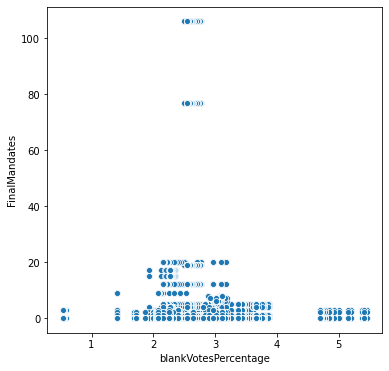

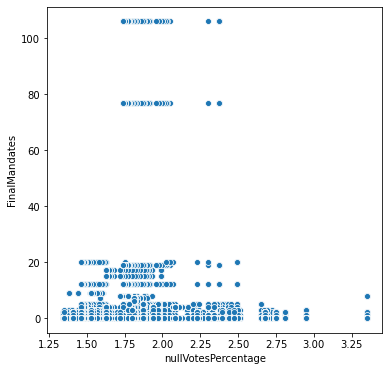

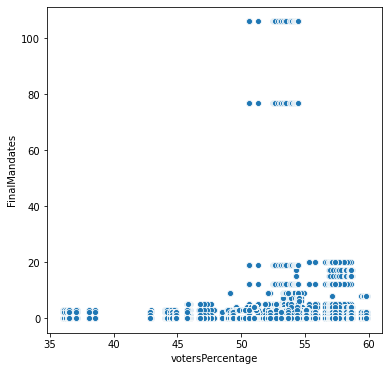

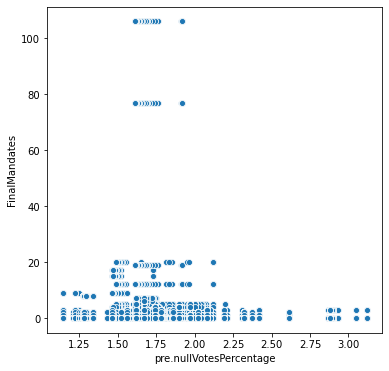

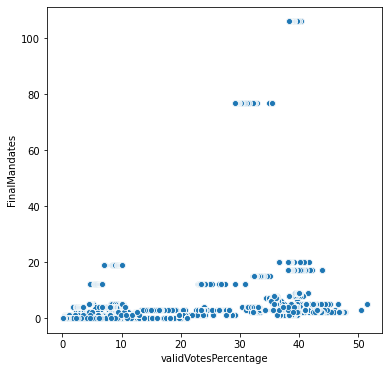

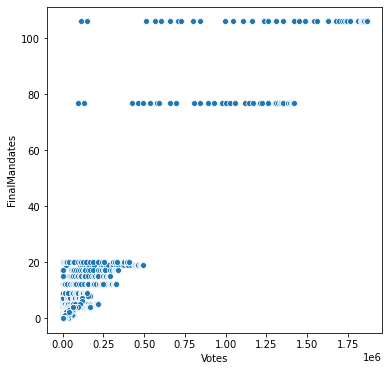

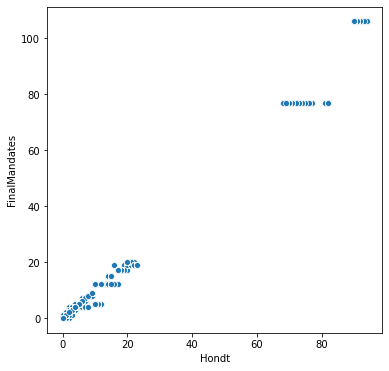

In [445]:
def scatter_func(dataset,lists):
    for i in lists:
        plt.figure(figsize = (6,6))
        sns.scatterplot(x=dataset[i],y=dataset['FinalMandates'],data=dataset)
        plt.xlabel(i)
        plt.ylabel('FinalMandates')
scatter_func(df,numerical_variables)

<Figure size 432x432 with 0 Axes>

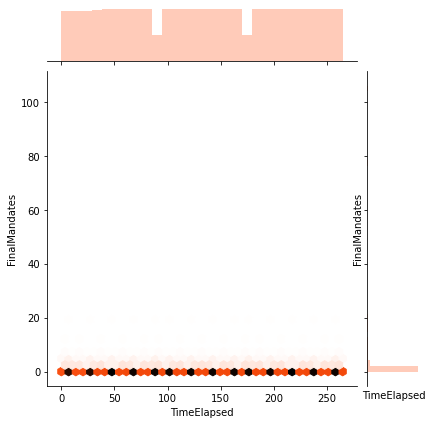

<Figure size 432x432 with 0 Axes>

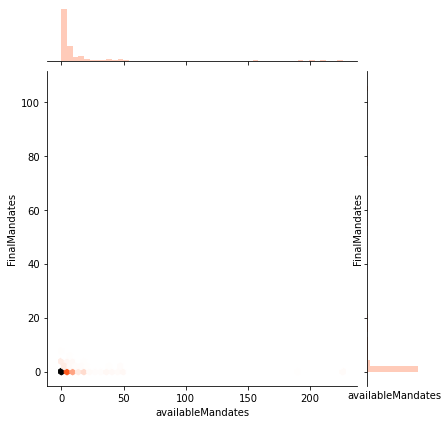

<Figure size 432x432 with 0 Axes>

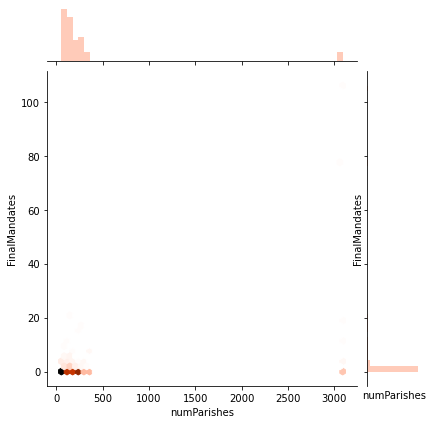

<Figure size 432x432 with 0 Axes>

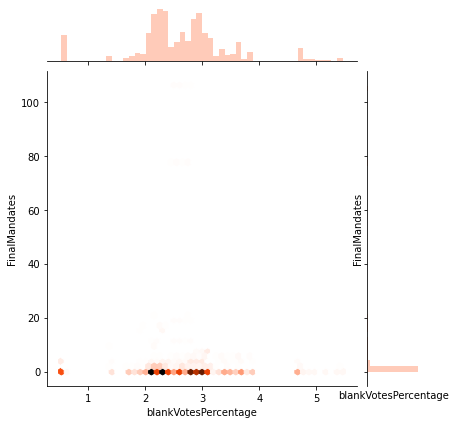

<Figure size 432x432 with 0 Axes>

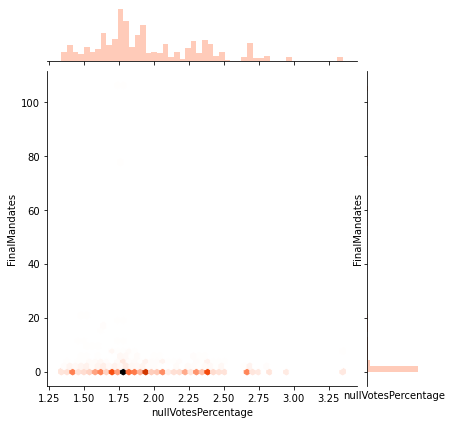

<Figure size 432x432 with 0 Axes>

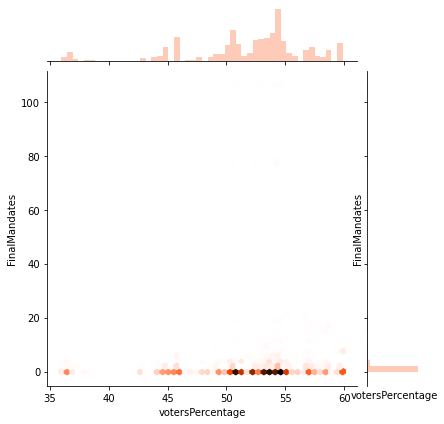

<Figure size 432x432 with 0 Axes>

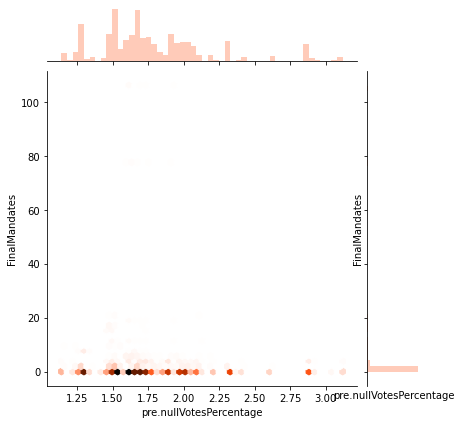

<Figure size 432x432 with 0 Axes>

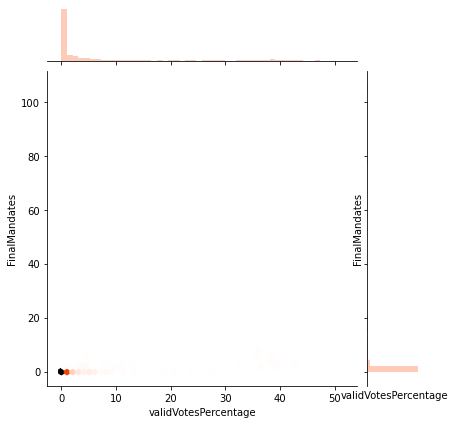

<Figure size 432x432 with 0 Axes>

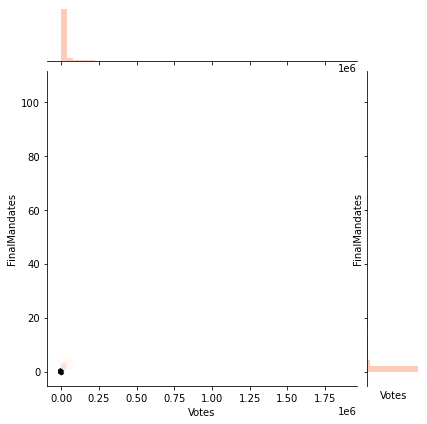

<Figure size 432x432 with 0 Axes>

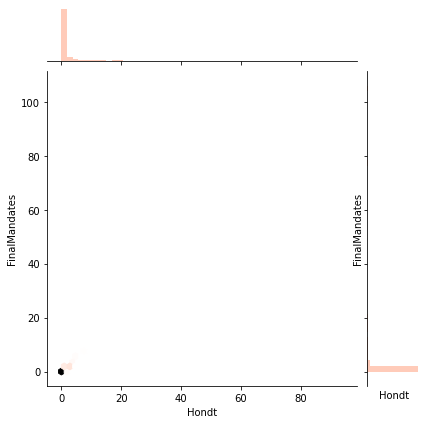

In [446]:
def joint_func(dataset,lists):
    for i in lists:
        plt.figure(figsize = (6,6))
        sns.jointplot(x=dataset[i],y=dataset['FinalMandates'],data=dataset,kind='hex',color='coral')
        plt.xlabel(i)
        plt.ylabel('FinalMandates')
joint_func(df,numerical_variables)


In [447]:
df.columns


Index(['TimeElapsed', 'time', 'territoryName', 'availableMandates',
       'numParishes', 'blankVotesPercentage', 'nullVotesPercentage',
       'votersPercentage', 'pre.nullVotesPercentage', 'Party',
       'validVotesPercentage', 'Votes', 'Hondt', 'FinalMandates'],
      dtype='object')

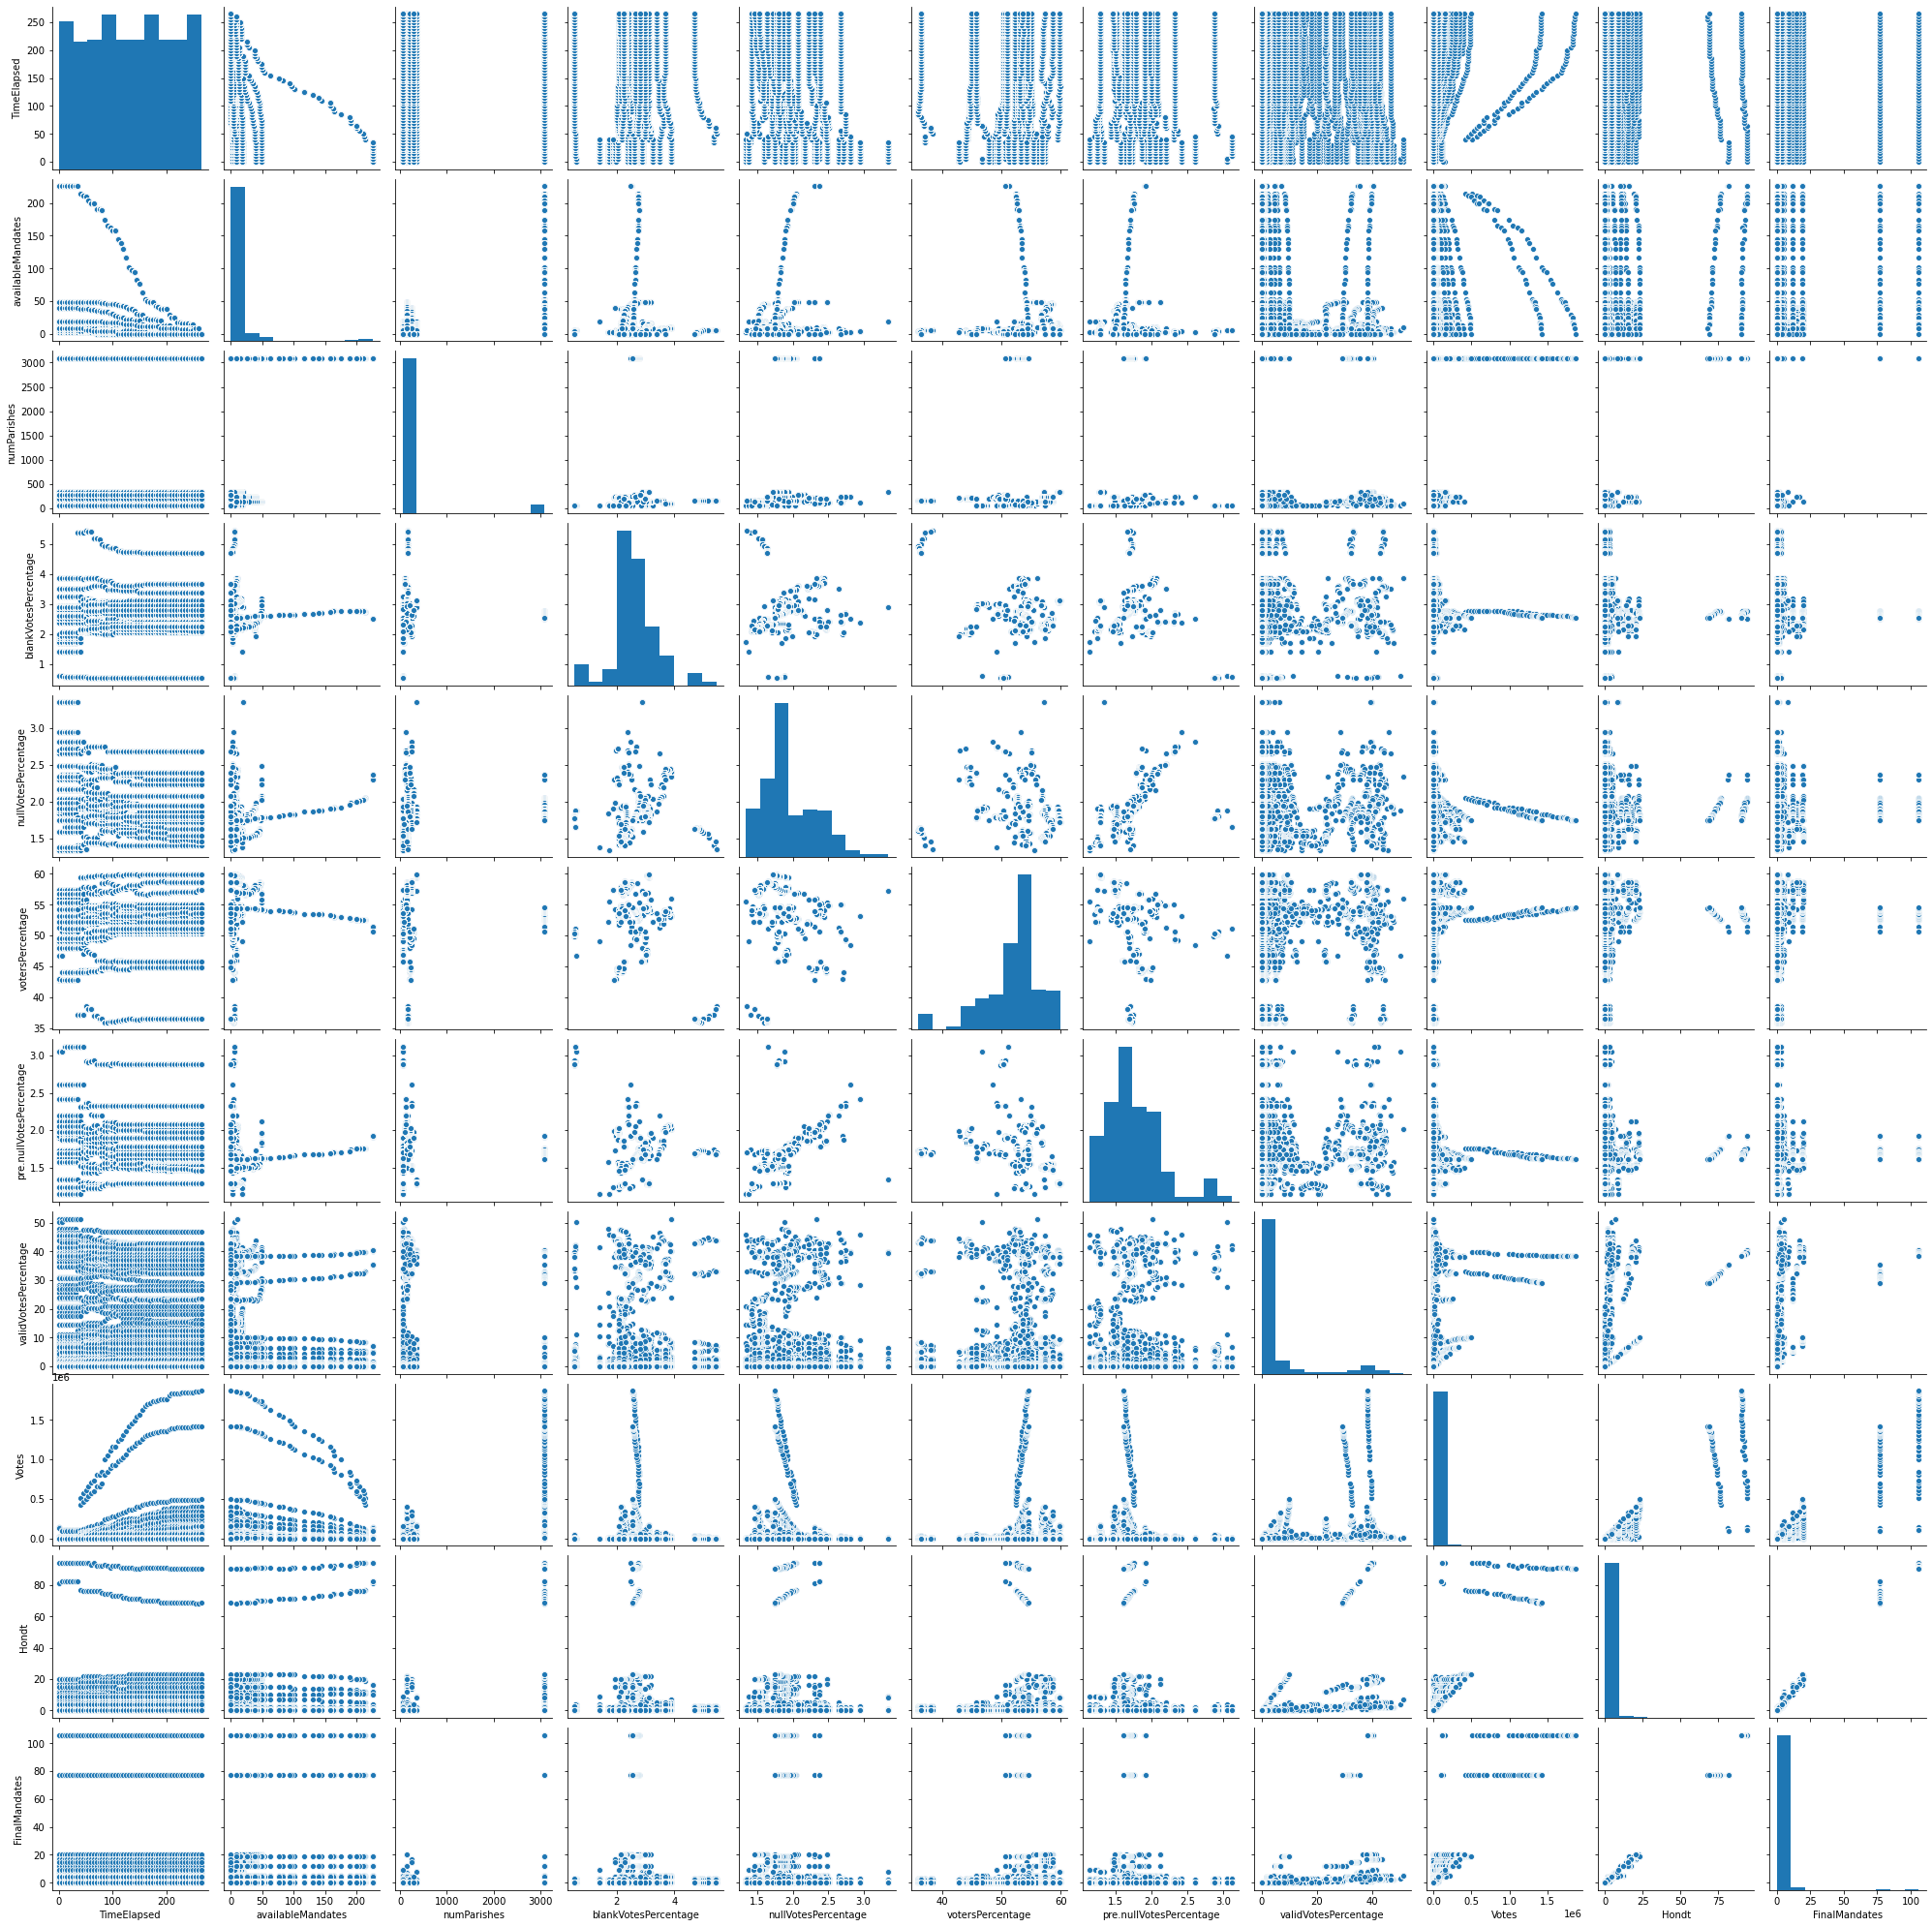

In [448]:
sns.pairplot(data=df)

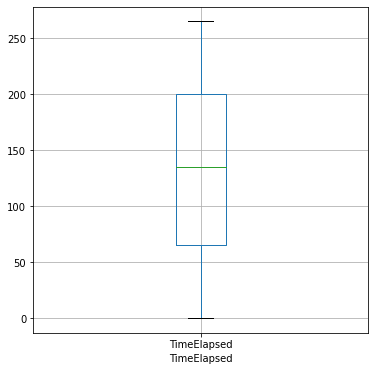

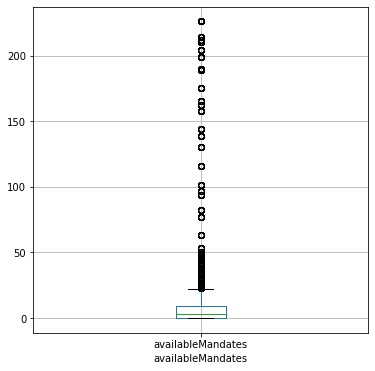

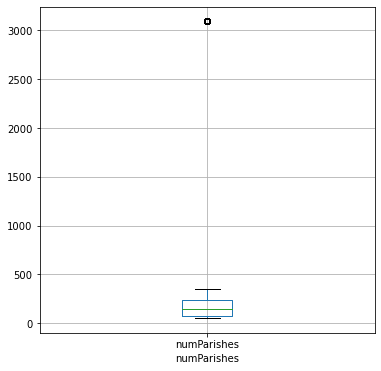

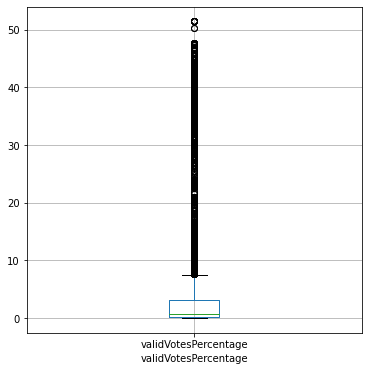

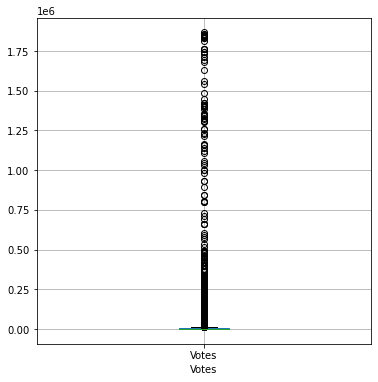

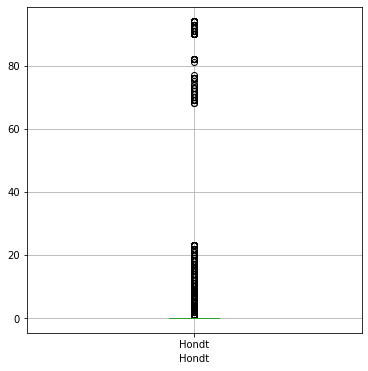

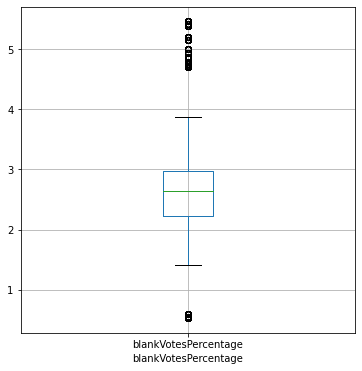

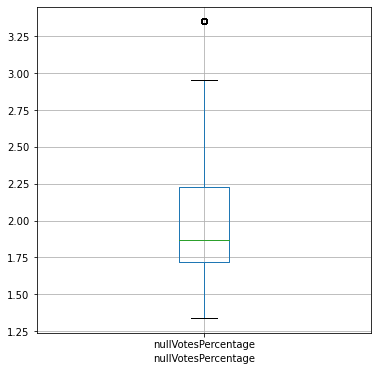

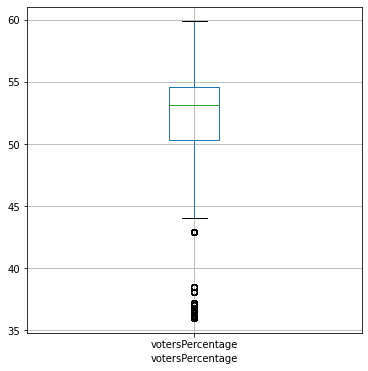

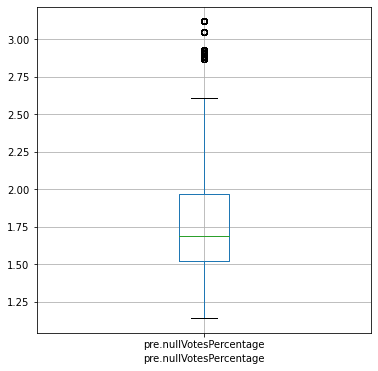

In [449]:
def box_func(dataset,lists):
    for i in lists:
        plt.figure(figsize = (6,6))
        dataset.boxplot(column=[i])
        plt.xlabel(i)
lis=['TimeElapsed','availableMandates','numParishes','validVotesPercentage','Votes','Hondt','blankVotesPercentage','nullVotesPercentage','votersPercentage','pre.nullVotesPercentage']
box_func(df,lis)
#df.boxplot(column = ['TimeElapsed','availableMandates','numParishes','validVotesPercentage','Votes','Hondt','blankVotesPercentage','nullVotesPercentage','votersPercentage','pre.nullVotesPercentage'])


In [450]:
q3 = df[numerical_variables].quantile(0.75)
q1 = df[numerical_variables].quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
TimeElapsed                 135.00
availableMandates             9.00
numParishes                 167.00
blankVotesPercentage          0.75
nullVotesPercentage           0.51
votersPercentage              4.26
pre.nullVotesPercentage       0.45
validVotesPercentage          2.93
Votes                      4274.00
Hondt                         0.00
dtype: float64


In [451]:
data_numerical = df[numerical_variables]
data_out = df[~((data_numerical < (q1 - 1.5 * iqr)) |(data_numerical > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(df.shape[0] - data_out.shape[0]))


7875 points are outliers based on IQR


In [452]:
df['Dates'] = pd.to_datetime(df['time']).dt.date
df['Time'] = pd.to_datetime(df['time']).dt.time


In [453]:
df.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates,Dates,Time
0,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106,2019-10-06,20:10:02
1,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77,2019-10-06,20:10:02
2,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19,2019-10-06,20:10:02
3,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5,2019-10-06,20:10:02
4,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12,2019-10-06,20:10:02


In [454]:
df.drop(['time'],axis=1,inplace=True)


In [455]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Dates_encoded']=pd.DataFrame(le.fit_transform(df.Dates))
df['Time_encoded']=pd.DataFrame(le.fit_transform(df.Time))
df['territoryName_encoded']=pd.DataFrame(le.fit_transform(df.territoryName))


In [456]:
df.head()


,TimeElapsed,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates,Dates,Time,Dates_encoded,Time_encoded,territoryName_encoded
0,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106,2019-10-06,20:10:02,0,8,16
1,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77,2019-10-06,20:10:02,0,8,16
2,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19,2019-10-06,20:10:02,0,8,16
3,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5,2019-10-06,20:10:02,0,8,16
4,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12,2019-10-06,20:10:02,0,8,16


In [457]:
df.drop(['Time','territoryName','Dates'],axis=1,inplace=True)


In [458]:
party_mean_encoded=pd.Series(df['Party'].value_counts())/len(df['Party'])
x=party_mean_encoded.to_dict()
df['Party_encoded']=df['Party'].map(x)
df.head()


,TimeElapsed,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates,Dates_encoded,Time_encoded,territoryName_encoded,Party_encoded
0,0,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106,0,8,16,0.052072
1,0,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77,0,8,16,0.052072
2,0,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19,0,8,16,0.052072
3,0,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5,0,8,16,0.052072
4,0,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12,0,8,16,0.052072


In [459]:
df.drop(['Party'],axis=1,inplace=True)
df.head()


,TimeElapsed,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,validVotesPercentage,Votes,Hondt,FinalMandates,Dates_encoded,Time_encoded,territoryName_encoded,Party_encoded
0,0,226,3092,2.5,2.3,51.36,1.91,40.22,147993,94,106,0,8,16,0.052072
1,0,226,3092,2.5,2.3,51.36,1.91,34.95,128624,81,77,0,8,16,0.052072
2,0,226,3092,2.5,2.3,51.36,1.91,7.15,26307,16,19,0,8,16,0.052072
3,0,226,3092,2.5,2.3,51.36,1.91,5.14,18923,12,5,0,8,16,0.052072
4,0,226,3092,2.5,2.3,51.36,1.91,4.83,17757,11,12,0,8,16,0.052072


In [460]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('FinalMandates',axis=1))
scaled_features=scaler.transform(df.drop('FinalMandates',axis=1))
dataset_scaled=pd.DataFrame(scaled_features,columns=df.columns[:-1])
dataset_scaled.head()


,TimeElapsed,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,validVotesPercentage,Votes,Hondt,FinalMandates,Dates_encoded,Time_encoded,territoryName_encoded
0,-1.714708,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,3.217832,1.419284,14.757327,-0.418374,-1.192483,0.982968,0.430888
1,-1.714708,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,2.733495,1.211248,12.691673,-0.418374,-1.192483,0.982968,0.430888
2,-1.714708,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,0.178549,0.112293,2.363404,-0.418374,-1.192483,0.982968,0.430888
3,-1.714708,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,-0.006179,0.032984,1.727818,-0.418374,-1.192483,0.982968,0.430888
4,-1.714708,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,-0.034669,0.020460,1.568922,-0.418374,-1.192483,0.982968,0.430888


In [461]:
X=df.drop(['FinalMandates'],axis=1)    #independent columns
y=df['FinalMandates']     #target column i.e price range
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [462]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [463]:
print(model.feature_importances_)

[0.00462252 0.02576688 0.0440396  0.0224285  0.01684681 0.02421185
 0.02036981 0.32951608 0.15735872 0.29925633 0.00050486 0.00251313
 0.03555082 0.01701408]


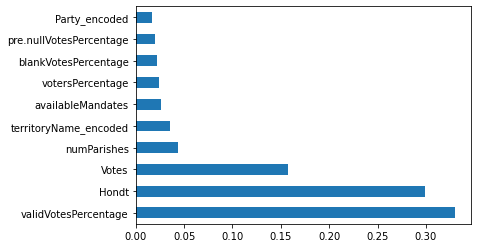

In [464]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

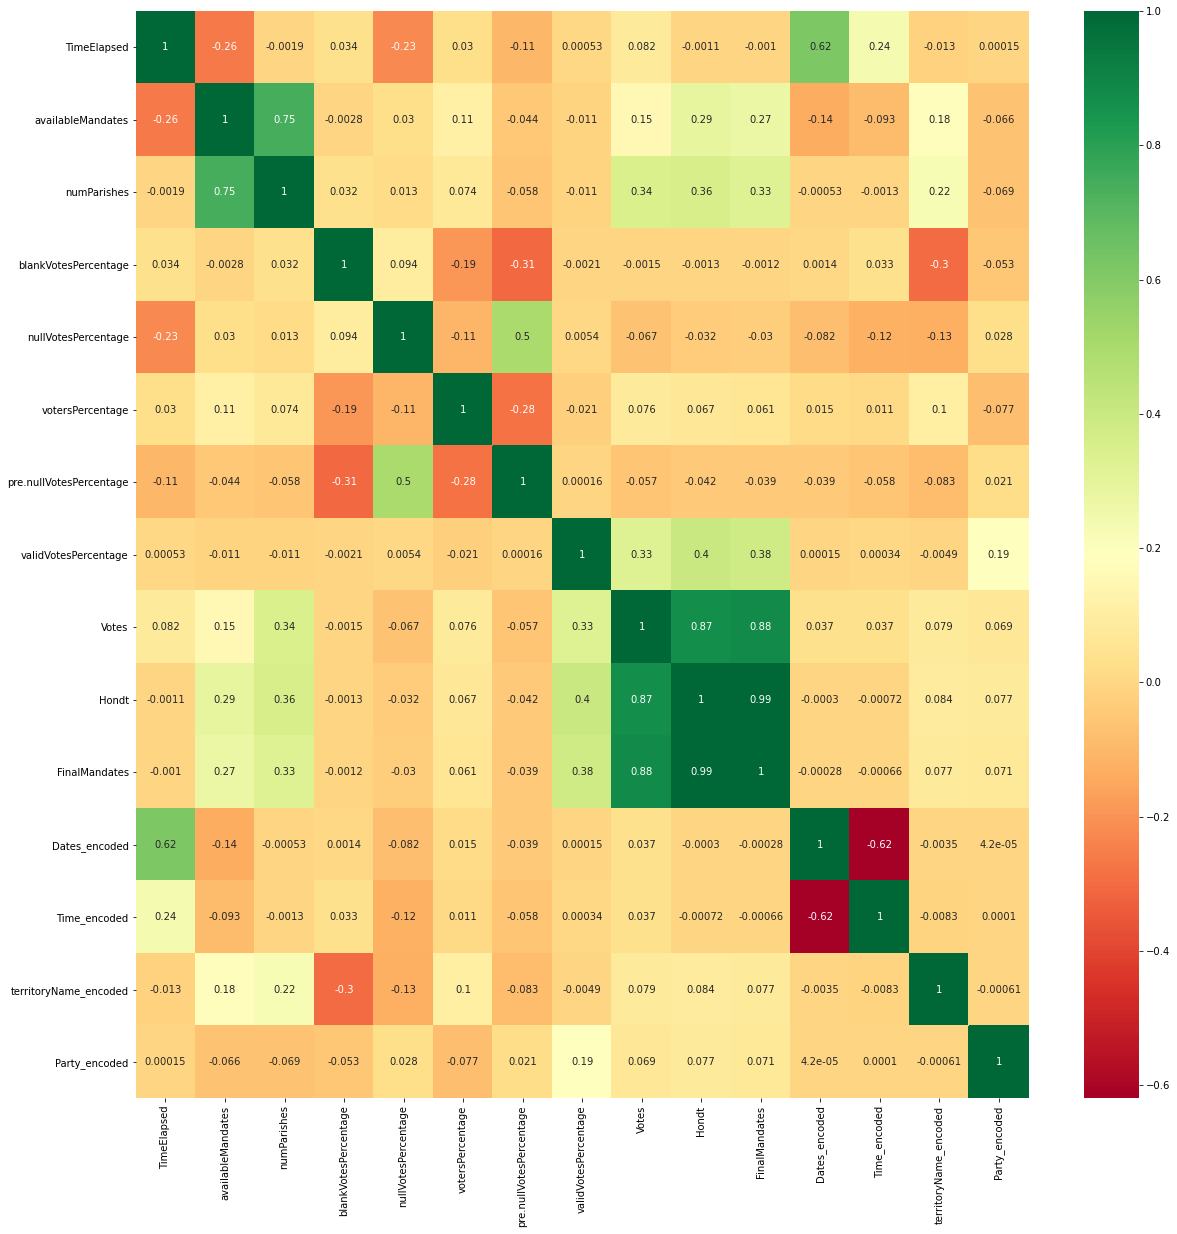

In [465]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [466]:
from sklearn.tree import DecisionTreeRegressor  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
# fit the regressor with X and Y data 
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [467]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(regressor, X_train, y_train, scoring="neg_mean_squared_error", cv=20)
tree_rmse_scores = np.sqrt(-tree_scores)

In [468]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [0.25938836 0.05448245 0.05136655 0.08121765 0.05136655 0.07264327
 0.03632164 0.05136655 0.08121765 0.03632164 0.03634562 0.27917599
 0.05140047 0.06295246 0.08902822 0.25700233 0.08127127 0.06295246
 0.10280093 0.11636275]
Mean: 0.0957492399236782
Standard deviation: 0.07430810890027839


In [469]:
from sklearn.linear_model import LinearRegression
print("Model: Linear Regression")
lin_reg = LinearRegression()


Model: Linear Regression


In [470]:
tree_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=20)
tree_rmse_scores = np.sqrt(-tree_scores)


In [471]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [0.69701011 0.67831082 0.69439736 0.44741073 0.66617663 0.6228765
 0.65554936 0.64022988 0.62241691 0.59499554 0.53810889 0.71031406
 0.61888099 0.73236124 0.62468441 0.52648765 0.6857807  0.61012915
 0.47867093 0.75801063]
Mean: 0.6301401257875743
Standard deviation: 0.0796058653497543


In [472]:
from sklearn.ensemble import RandomForestRegressor
print("Model: Random Forest Regressor")
forest_reg = RandomForestRegressor()

Model: Random Forest Regressor


In [473]:
tree_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=20)
tree_rmse_scores = np.sqrt(-tree_scores)


In [474]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)


Scores: [0.14533648 0.06712026 0.0484237  0.09281795 0.08306062 0.06804281
 0.02957928 0.05358149 0.08752534 0.03670642 0.05304717 0.21982472
 0.04693231 0.10343555 0.07961912 0.07517873 0.04309932 0.03093395
 0.08401972 0.08192201]
Mean: 0.07651034826512093
Standard deviation: 0.042666455489973505


In [475]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [50,100,200], 'max_features': [5,10,15,18],
               'bootstrap': [True,False], 'min_samples_leaf':[1,2], 
               'min_samples_split':[2,3]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  9.9min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_features': [5, 10, 15, 18],
                          'min_samples_leaf': [1, 2],
                          'min_samples_split': [2, 3],
                          'n_estimators': [50, 100, 200]}],
             scoring='neg_mean_squared_error', verbose=1)

In [476]:
print(" ----------------- GRID_SEARCH INFO -----------------\n ")
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print("Best CV score:", np.sqrt(-grid_search.best_score_))
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

 ----------------- GRID_SEARCH INFO -----------------
 
{'bootstrap': False, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestRegressor(bootstrap=False, max_features=10, n_estimators=200)
Best CV score: 0.07828886280694056
0.13330111343377538 {'bootstrap': True, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.12527799135576453 {'bootstrap': True, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.11906098633353687 {'bootstrap': True, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.14808683780754697 {'bootstrap': True, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
0.14479069577465478 {'bootstrap': True, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
0.1325405657689551 {'bootstrap': True, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples

In [477]:
from sklearn.metrics import mean_squared_error
final_model = grid_search.best_estimator_
# predictions
final_predictions = final_model.predict(X_test)
# calculate RMSE
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


0.08761024165727757

In [478]:
from sklearn import metrics
print('R2_Score: ', metrics.r2_score(y_test,final_predictions))


R2_Score:  0.9998633983862045


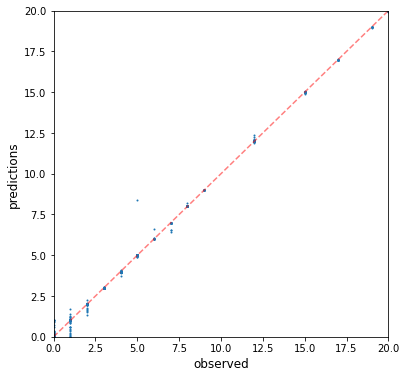

In [479]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,final_predictions,alpha=1, s=1)
plt.xlabel('observed', fontsize=12)
plt.ylabel('predictions', fontsize=12)
plt.plot([0,(np.max(y_test) + 5000)],[0,(np.max(y_test) + 5000)], 'r--', alpha=0.5)
plt.axis([0,20,0,20])
plt.show()

